In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

from pmdarima import auto_arima

#import warnings
#warnings.simplefilter(action="ignore")

# Set all columns and rows to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Import Data

In [2]:
# Import the dataset
data = pd.read_csv("../datasets/data_features.csv")

In [3]:
# Check the data
data.head()

,time,dengue_cases,denv_1,denv_2,denv_3,denv_4,Mean Temperature (°C),Mean Wind Speed (km/h),Daily Rainfall Total (mm),Maximum Temperature (°C),Max Wind Speed (km/h),Minimum Temperature (°C),google_trends,s_ratio,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2018-04-08,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0,0,1,0,0,0,0,0,0,0,0
1,2018-04-15,56,0.0,0.505,0.484,0.011,28.528571,10.714286,0.742857,33.8,36.7,25.5,20.0,0.725367,0,0,1,0,0,0,0,0,0,0,0
2,2018-04-22,55,0.0,0.505,0.484,0.011,28.914286,9.828571,2.057143,34.4,38.2,24.6,18.0,0.725189,0,0,1,0,0,0,0,0,0,0,0
3,2018-04-29,74,0.0,0.505,0.484,0.011,28.142857,7.700000,0.371429,34.3,37.1,25.5,21.0,0.725087,0,0,1,0,0,0,0,0,0,0,0
4,2018-05-06,62,0.0,0.505,0.484,0.011,28.414286,6.842857,4.800000,35.0,43.6,22.6,23.0,0.724806,0,0,0,1,0,0,0,0,0,0,0


In [4]:
# Check the shape of the data
data.shape

(257, 25)

In [5]:
# Look at the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       257 non-null    object 
 1   dengue_cases               257 non-null    int64  
 2   denv_1                     256 non-null    float64
 3   denv_2                     256 non-null    float64
 4   denv_3                     256 non-null    float64
 5   denv_4                     256 non-null    float64
 6   Mean Temperature (°C)      256 non-null    float64
 7   Mean Wind Speed (km/h)     256 non-null    float64
 8   Daily Rainfall Total (mm)  256 non-null    float64
 9   Maximum Temperature (°C)   256 non-null    float64
 10  Max Wind Speed (km/h)      256 non-null    float64
 11  Minimum Temperature (°C)   256 non-null    float64
 12  google_trends              256 non-null    float64
 13  s_ratio                    257 non-null    float64

### Date Processing

The date feature is currently an object time. We will be converting it into a dateTime format.

In [6]:
# Convert the date column into dateTime format
data['time'] = pd.to_datetime(data['time'])

In [7]:
# Set the time as the index
data = data.set_index('time')

In [8]:
# Check the data 
data.head()

,dengue_cases,denv_1,denv_2,denv_3,denv_4,Mean Temperature (°C),Mean Wind Speed (km/h),Daily Rainfall Total (mm),Maximum Temperature (°C),Max Wind Speed (km/h),Minimum Temperature (°C),google_trends,s_ratio,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
time,,,,,,,,,,,,,,,,,,,,,,,,
2018-04-08,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0,0,1,0,0,0,0,0,0,0,0
2018-04-15,56,0.0,0.505,0.484,0.011,28.528571,10.714286,0.742857,33.8,36.7,25.5,20.0,0.725367,0,0,1,0,0,0,0,0,0,0,0
2018-04-22,55,0.0,0.505,0.484,0.011,28.914286,9.828571,2.057143,34.4,38.2,24.6,18.0,0.725189,0,0,1,0,0,0,0,0,0,0,0
2018-04-29,74,0.0,0.505,0.484,0.011,28.142857,7.700000,0.371429,34.3,37.1,25.5,21.0,0.725087,0,0,1,0,0,0,0,0,0,0,0
2018-05-06,62,0.0,0.505,0.484,0.011,28.414286,6.842857,4.800000,35.0,43.6,22.6,23.0,0.724806,0,0,0,1,0,0,0,0,0,0,0


In [9]:
# set frequency of data
data = data.asfreq('W-SUN')

# remove first row
data = data[1:]

In [10]:
# drop unnecessary rows
data.drop(columns=['denv_1', 'denv_2', 'denv_3', 'denv_4', 
                   'Mean Temperature (°C)', 'Mean Wind Speed (km/h)',
                   'Maximum Temperature (°C)', 'Max Wind Speed (km/h)'
                  ],
          inplace=True
         )

### Conversion to Sliding Time Window

In [11]:
# transform a time series dataset into a supervised learning dataset
def series_to_window(data, var_list=None, n_in=1, n_out=1, dropnan=True):
    
    # isolate selected variables
    if var_list is None:
        temp = data.copy()
    elif type(var_list) is list:
        temp = data[var_list].copy()
    else:
        temp = data[[var_list]].copy()
    
    df = pd.DataFrame(index=data.index)
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols = temp.shift(i)
        cols.columns = [f'{name}_lag_{i}' for name in cols.columns]
        df = pd.concat([df, cols], axis=1)
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols = temp.shift(-i)
        if not i == 0:
            cols.columns = [f'{name}_lead_{i}' for name in cols.columns]
        df = pd.concat([df, cols], axis=1)
    
    # combine shifted and non-shifted data
    if var_list is None:
        return df
    else:
        df = pd.concat([data.drop(columns=var_list), df], axis=1)
    
    # drop rows with NaN values
    if dropnan:
        df.dropna(inplace=True)
    
    return df

In [12]:
# specific variables to convert
sliding_vars = ['Daily Rainfall Total (mm)', 
                'Minimum Temperature (°C)',
                'google_trends', 
                's_ratio']

# convert
data = series_to_window(data, var_list=sliding_vars, n_in=8)

### Train/Test Split

Given that this is a time series, we do a 30% train test split by time
* Train: ~75% of data - 2018 to 2021
* Test: ~25% of data - 2022 to 2023

In [11]:
# with 257 datapoints, the 195th data point is the end of 2018 and coincides with 75th percentile of datapoints by time
195/257

0.7587548638132295

In [14]:
# Train data will coveer 2018 to 2021
train = data.iloc[:195]

# Test data will cover 2022 to March 2023
test = data.iloc[195:]

In [15]:
train.shape

(195, 48)

In [16]:
test.shape

(53, 48)

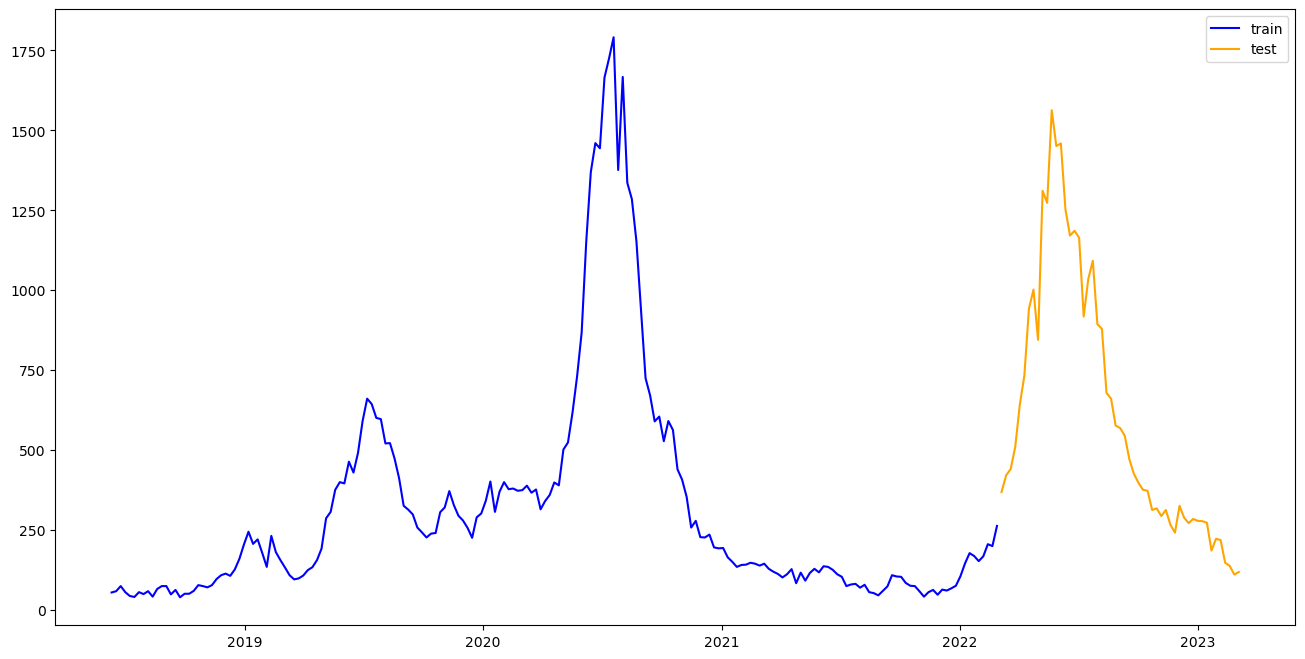

In [17]:
# Time series plot of the train and test data
def train_test_plot(train, test):
    plt.figure(figsize=(16, 8))
    
    plt.plot(train[['dengue_cases']], c='blue')
    plt.plot(test[['dengue_cases']], c='orange')
    
    plt.legend(['train', 'test'])
    
    plt.show()
    
train_test_plot(train, test)

## Random Forest Regression on Time Series

In [18]:
# instantiate RF model
model = RandomForestRegressor(n_estimators=1000)

# fit model
model.fit(train.drop(columns='dengue_cases'), train['dengue_cases'])

RandomForestRegressor(n_estimators=1000)

In [22]:
model.score(train.drop(columns='dengue_cases'), train['dengue_cases'])

0.9897725821355172

In [25]:
preds = pd.DataFrame(model.predict(test.drop(columns='dengue_cases')), index=test.index)

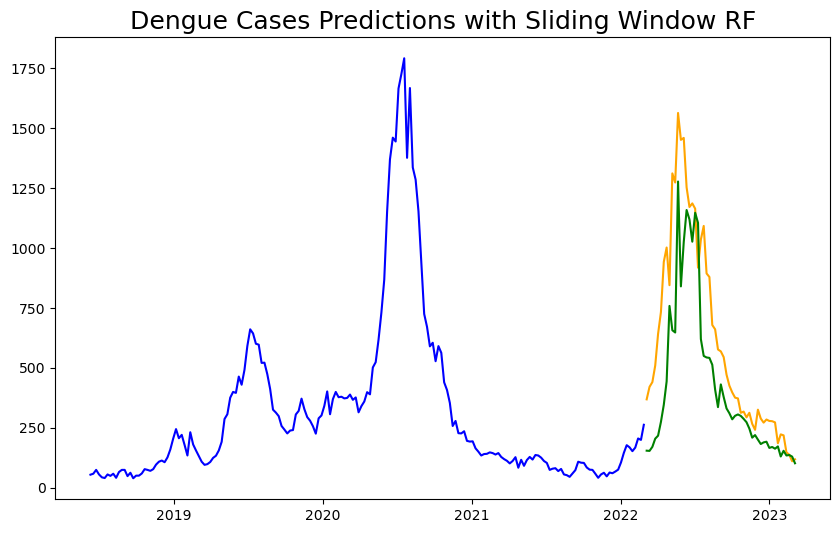

In [27]:
# Plot data.
plt.figure(figsize=(10,6))

# Plot training data in blue.
plt.plot(train['dengue_cases'], color = 'blue')

# Plot testing data in orange.
plt.plot(test['dengue_cases'], color = 'orange')

# Plot predicted values in green.
plt.plot(preds, color = 'green')

plt.title(label = 'Dengue Cases Predictions with Sliding Window RF', fontsize=18)
plt.show();

In [28]:
# Evaluation of the model
error = round(mean_squared_error(test['dengue_cases'], preds, squared=False), 0)
print(f'Minimum Dengue Cases: {round(data["dengue_cases"].min(),0)}')
print(f'Maximum Dengue Cases: {round(data["dengue_cases"].max(),0)}')

print(f'RMSE: {error}')
print(f'RMSE relative to minimum values in dengue cases: {round(error / data["dengue_cases"].min(),0)}.')
print(f'RMSE relative to maximum values in dengue cases: {round(error / data["dengue_cases"].max(),0)}.')

Minimum Dengue Cases: 40
Maximum Dengue Cases: 1791
RMSE: 272.0
RMSE relative to minimum values in dengue cases: 7.0.
RMSE relative to maximum values in dengue cases: 0.0.
